In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix, mean_squared_error, auc, roc_curve
pd.set_option("display.max_rows", None, "display.max_columns", None)
import math

from scipy.stats import pointbiserialr
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency


# Describing the data

In [ ]:
train_data_raw = pd.read_csv("/content/train.csv")
test_data_raw = pd.read_csv("/content/test.csv")

In [ ]:
train_data.describe()

,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO_TV,EDUCATION,RETRAINING,AMOUNT,SAV_ACCT,EMPLOYMENT,INSTALL_RATE,CO_APPLICANT,GUARANTOR,PRESENT_RESIDENT,REAL_ESTATE,PROP_UNKN_NONE,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,RESPONSE,GENDER
count,3988.000000,3988.000000,3988.000000,3988.000000,3988.000000,3988.000000,3988.000000,3988.000000,3988.000000,3988.000000,3988.000000,3988.000000,3988.000000,3988.000000,3988.000000,3988.000000,3988.000000,3988.000000,3988.000000,3988.000000,3988.000000,3988.000000,3988.000000,3988.000000,3988.000000,3988.000000,3988.000000,3988.000000,3988.000000
mean,1.497828,21.116215,2.453154,0.242486,0.101109,0.189411,0.244325,0.047003,0.098922,3583.913490,1.073165,2.251958,2.517486,0.045917,0.050319,2.847374,0.248551,0.172766,35.001576,0.191467,0.198362,0.684986,1.209258,1.924387,1.160425,0.401627,0.029443,0.500000,0.710130
std,1.208218,11.859318,1.029200,0.410602,0.290262,0.372028,0.413375,0.201848,0.286687,3181.440887,1.473820,1.167807,1.002419,0.197888,0.210130,1.067028,0.416998,0.358756,11.354721,0.372047,0.377656,0.442399,0.452416,0.628307,0.350090,0.469525,0.164809,0.500063,0.453759
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2543.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,14.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.162624,12.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1379.846121,0.000000,1.334768,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,26.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,18.724556,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2502.000000,0.000000,2.000000,2.969830,0.000000,0.000000,3.000000,0.000000,0.000000,33.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.500000,1.000000
75%,3.000000,25.905282,3.166690,0.425758,0.000000,0.000000,0.442460,0.000000,0.000000,4700.866582,2.000000,3.000000,3.000000,0.000000,0.000000,4.000000,0.486181,0.000000,41.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,3.000000,72.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,20249.000000,4.000000,4.000000,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,78.000000,1.000000,1.000000,1.000000,4.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
x_train.info()

NameError: ignored

In [ ]:
train_data_raw = train_data_raw.dropna()

In [ ]:
train_data_raw['AGE']=np.where(train_data_raw['AGE']==999,train_data_raw['AGE'].median(),train_data_raw.AGE)
train_data_raw['AMOUNT']=np.where(train_data_raw['AMOUNT']==9999999, train_data_raw['AMOUNT'].median(),train_data_raw.AMOUNT)

In [ ]:
train_data_raw['AGE']=np.where(train_data_raw['AGE']==train_data_raw['AGE'].mean(),78,train_data_raw.AGE)
train_data_raw['AMOUNT']=np.where(train_data_raw['AMOUNT']==9999999, train_data_raw['AMOUNT'].mean(),train_data_raw.AMOUNT)

In [ ]:
train_data_raw['AGE']=np.where(train_data_raw['AGE']==train_data_raw['AGE'].mean(),78,train_data_raw.AGE)
train_data_raw['AMOUNT']=np.where(train_data_raw['AMOUNT']==9999999, ,train_data_raw.AMOUNT)

In [ ]:
train_data_raw['EDUCATION']=train_data_raw['EDUCATION'].fillna(train_data_raw['EDUCATION'].value_counts().idxmax())
#train_data_raw['AMOUNT']=train_data_raw['AMOUNT'].fillna(train_data_raw['AMOUNT'].median())
train_data_raw['RENT']=train_data_raw['RENT'].fillna(train_data_raw['RENT'].value_counts().idxmax())
train_data_raw['JOB']=train_data_raw['JOB'].fillna(train_data_raw['JOB'].value_counts().idxmax())


In [ ]:
train_data_raw=train_data_raw.loc[train_data_raw['AGE']<100]
train_data_raw=train_data_raw.loc[train_data_raw['AMOUNT']<1000000]

In [ ]:
# Remove the 1st column (ID).
train_data1 = train_data_raw.drop(columns='ID')
test_data = test_data_raw.drop(columns='ID')

In [ ]:
x_train1=train_data1.drop(columns='RESPONSE')
y_train1=train_data1[['RESPONSE']]

In [ ]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=100)
columns = x_train1.columns
os_data_x,os_data_y=os.fit_sample(x_train1, y_train1)
os_data_x = pd.DataFrame(data=os_data_x,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['RESPONSE'])
train_data=pd.concat([os_data_x, os_data_y], axis=1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
train_data['NEW_CAR'].unique()

array([0., 1.])

In [ ]:
from imblearn.over_sampling import RandomOverSampler
columns = x_train1.columns
oversample = RandomOverSampler(sampling_strategy='minority')
x_over, y_over = oversample.fit_resample(x_train1, y_train1)
x_over = pd.DataFrame(data=x_over,columns=columns )
y_over= pd.DataFrame(data=y_over,columns=['RESPONSE'])
train_data=pd.concat([x_over, y_over], axis=1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
train_data['GENDER']=np.where((train_data['MALE_DIV']+train_data['MALE_MAR_or_WID']+train_data['MALE_SINGLE'])==0,0,1)
train_data=train_data.drop(columns=['MALE_DIV','MALE_MAR_or_WID','MALE_SINGLE'])

In [ ]:
x_train=train_data.drop(columns='RESPONSE')
y_train=train_data[['RESPONSE']]

In [ ]:
test_data['GENDER']=np.where((test_data['MALE_DIV']+test_data['MALE_MAR_or_WID']+test_data['MALE_SINGLE'])==0,0,1)
test_data=test_data.drop(columns=['MALE_DIV','MALE_MAR_or_WID','MALE_SINGLE'])

In [ ]:
x_train.to_csv('\r xtrain.csv', index = False, header=True)
y_train.to_csv('\r ytrain.csv', index = False, header=True)

In [ ]:
train_data.head()

,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO_TV,EDUCATION,RETRAINING,AMOUNT,SAV_ACCT,EMPLOYMENT,INSTALL_RATE,MALE_DIV,MALE_SINGLE,MALE_MAR_or_WID,CO_APPLICANT,GUARANTOR,PRESENT_RESIDENT,REAL_ESTATE,PROP_UNKN_NONE,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,RESPONSE
0,3.0,16.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3226.0,0.0,2.0,3.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,41.0,0.0,0.0,1.0,1.0,2.0,1.0,0.0,0.0,1
1,1.0,13.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3158.0,0.0,3.0,2.0,0.0,1.0,0.0,0.0,0.0,4.0,1.0,0.0,42.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,0.0,1
2,1.0,16.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1269.0,0.0,2.0,2.0,0.0,1.0,0.0,0.0,1.0,3.0,0.0,0.0,23.0,1.0,0.0,1.0,1.0,2.0,1.0,0.0,0.0,1
3,1.0,8.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2575.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,23.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0
4,0.0,16.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,5908.0,4.0,4.0,3.0,0.0,1.0,0.0,0.0,0.0,4.0,0.0,1.0,34.0,0.0,1.0,1.0,1.0,2.0,2.0,1.0,0.0,1


(array([2010.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2010.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

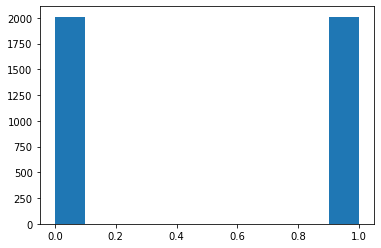

In [ ]:
plt.hist(train_data['RESPONSE'])

# Logistic Regression Model with all predictors

In [ ]:
# We use statsmodel.formula.api which supports "R-style formula"
# https://songhuiming.github.io/pages/2016/07/12/statsmodels-regression-examples/

# Another option is sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
# There are some subtle technical reasons that causes sklearn to have different results from statsmodel:
# https://stackoverflow.com/questions/50428825/different-coefficients-scikit-learn-vs-statsmodels-logistic-regression
# Sklearn applies regularisation to logistic regression by default

all_predictors = "+".join(train_data.drop(['RESPONSE'],axis=1).columns)
print(all_predictors)

CHK_ACCT+DURATION+HISTORY+NEW_CAR+USED_CAR+FURNITURE+RADIO_TV+EDUCATION+RETRAINING+AMOUNT+SAV_ACCT+EMPLOYMENT+INSTALL_RATE+CO_APPLICANT+GUARANTOR+PRESENT_RESIDENT+REAL_ESTATE+PROP_UNKN_NONE+AGE+OTHER_INSTALL+RENT+OWN_RES+NUM_CREDITS+JOB+NUM_DEPENDENTS+TELEPHONE+FOREIGN+GENDER


In [ ]:
f = 'RESPONSE ~ '+all_predictors
logitfit = smf.logit(formula = f, data = train_data).fit()
print(logitfit.summary())

#    We can see that many predictors are not significant in explaining the probability of churning.  
#    Note that quite strong multicollinearity also exists. Hence, we need to remove some explanatory variables.

Optimization terminated successfully.
         Current function value: 0.610461
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               RESPONSE   No. Observations:                 3988
Model:                          Logit   Df Residuals:                     3959
Method:                           MLE   Df Model:                           28
Date:                Thu, 11 Nov 2021   Pseudo R-squ.:                  0.1193
Time:                        03:22:03   Log-Likelihood:                -2434.5
converged:                       True   LL-Null:                       -2764.3
Covariance Type:            nonrobust   LLR p-value:                5.633e-121
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.3869      0.260     -5.331      0.000      -1.897      -0.877
CHK_ACCT   

# Removing variables that are highly correlated or high p-value

In [ ]:
# The following function generates the formula to input into the statsmodel function, 
# with specified predictors(columns) removed. 
droplist = ['RESPONSE']

def remove_name_formula(toremove):
    print(type(toremove))
    global droplist
    droplist = droplist+toremove
    newdf = train_data.drop(droplist,axis=1)
    predictors = "+".join(newdf.columns)
    f = 'RESPONSE ~ '+predictors
    return f

In [ ]:
f = remove_name_formula(['NUM_CREDITS','FURNITURE','EDUCATION','PRESENT_RESIDENT','NEW_CAR','MALE_MAR_or_WID','MALE_DIV','RETRAINING','CO_APPLICANT'])
logitfit = smf.logit(formula = f, data = train_data).fit()
print(logitfit.summary())

<class 'list'>
Optimization terminated successfully.
         Current function value: 0.607787
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               RESPONSE   No. Observations:                 3988
Model:                          Logit   Df Residuals:                     3966
Method:                           MLE   Df Model:                           21
Date:                Thu, 11 Nov 2021   Pseudo R-squ.:                  0.1231
Time:                        01:32:16   Log-Likelihood:                -2423.9
converged:                       True   LL-Null:                       -2764.3
Covariance Type:            nonrobust   LLR p-value:                1.480e-130
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.4398      0.250     -5.769      0.000      -1.929      -0.951
CH

In [ ]:
categorical_variables = ['CHK_ACCT', 'HISTORY', 'NEW_CAR', 'USED_CAR', 'FURNITURE',
       'RADIO_TV', 'EDUCATION', 'RETRAINING', 'SAV_ACCT',
       'EMPLOYMENT', 'CO_APPLICANT', 'GUARANTOR', 'PRESENT_RESIDENT',
       'REAL_ESTATE', 'PROP_UNKN_NONE', 'OTHER_INSTALL', 'RENT',
       'OWN_RES', 'JOB', 'TELEPHONE',
       'FOREIGN','GENDER']

In [ ]:
continuous_variables = ['DURATION', 'AMOUNT', 'INSTALL_RATE','AGE','NUM_CREDITS','NUM_DEPENDENTS']

In [ ]:
# Find Point biserial correlation
for cat_var in categorical_variables:
  for cont_var in  continuous_variables:
    data_cat = train_data[cat_var].to_numpy()
    data_cont = train_data[cont_var].to_numpy()
    
    corr, p_val = pointbiserialr(x=data_cat, y=data_cont)
    if np.abs(corr) >= 0.2:
      print(f'Categorical variable: {cat_var}, Continuous variable: {cont_var}, correlation: {corr}')

Categorical variable: HISTORY, Continuous variable: NUM_CREDITS, correlation: 0.20498609262222028
Categorical variable: USED_CAR, Continuous variable: AMOUNT, correlation: 0.2736065647127563
Categorical variable: REAL_ESTATE, Continuous variable: AMOUNT, correlation: -0.208769572670077
Categorical variable: PROP_UNKN_NONE, Continuous variable: AMOUNT, correlation: 0.25953281958111785
Categorical variable: JOB, Continuous variable: DURATION, correlation: 0.22848957398562178
Categorical variable: JOB, Continuous variable: AMOUNT, correlation: 0.267078987444083
Categorical variable: TELEPHONE, Continuous variable: AMOUNT, correlation: 0.2540585796814715


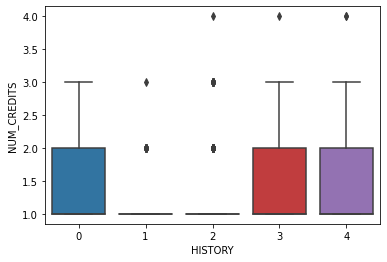

In [ ]:
sns.boxplot(data=train_data_raw, x='HISTORY',y='NUM_CREDITS')

In [ ]:
# Find Pearson correlation
total_len = len(continuous_variables)
for idx1 in range(total_len-1):
  for idx2 in range(idx1+1, total_len):
    cont_var1 = continuous_variables[idx1]
    cont_var2 = continuous_variables[idx2]
    data_cont1 = train_data[cont_var1].to_numpy()
    data_cont2 = train_data[cont_var2].to_numpy()
    corr, p_val = pearsonr(x=data_cont1, y=data_cont2)
    if np.abs(corr) >= 0.1:
      print(f'Variable 1: {cont_var1}, Variable 2: {cont_var2}, correlation: {corr}')

Variable 1: DURATION, Variable 2: AMOUNT, correlation: 0.36243834368407785
Variable 1: AMOUNT, Variable 2: INSTALL_RATE, correlation: -0.1605374237996371
Variable 1: AGE, Variable 2: NUM_CREDITS, correlation: 0.13565358785690573
Variable 1: AGE, Variable 2: NUM_DEPENDENTS, correlation: 0.12684505714038422


In [ ]:
# Find Cramer's V correlation
total_len = len(categorical_variables)
for idx1 in range(total_len-1):
  for idx2 in range(idx1+1, total_len):
    cat_var1 = categorical_variables[idx1]
    cat_var2 = categorical_variables[idx2]    
    c_matrix = pd.crosstab(train_data[cat_var1], train_data[cat_var2])

    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = chi2_contingency(c_matrix)[0]
    n = c_matrix.sum().sum()
    phi2 = chi2/n
    r,k = c_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    corr = np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))
    if corr >= 0.8:
      print(f'categorical variable 1 {cat_var1}, categorical variable 2: {cat_var2}, correlation: {corr}')

categorical variable 1 CHK_ACCT, categorical variable 2: EMPLOYMENT, correlation: 0.8070720213933383
categorical variable 1 EMPLOYMENT, categorical variable 2: GUARANTOR, correlation: 0.822276630445781
categorical variable 1 EMPLOYMENT, categorical variable 2: PRESENT_RESIDENT, correlation: 0.8098594731646451


In [ ]:
d = train_data[['MonthlyCharges','TotalCharges','tenure']]
d.corr()

KeyError: ignored

In [ ]:
newf = remove_name_formula(['EDUCATION'])
logitfit = smf.logit(formula = newf, data = train_data).fit()
print(logitfit.summary())
# We fit a logistic regression model with all explanatory variables other than "tenure"

<class 'list'>
Optimization terminated successfully.
         Current function value: 0.610565
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               RESPONSE   No. Observations:                 3988
Model:                          Logit   Df Residuals:                     3964
Method:                           MLE   Df Model:                           23
Date:                Thu, 11 Nov 2021   Pseudo R-squ.:                  0.1191
Time:                        03:24:16   Log-Likelihood:                -2434.9
converged:                       True   LL-Null:                       -2764.3
Covariance Type:            nonrobust   LLR p-value:                2.208e-124
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.4049      0.236     -5.946      0.000      -1.868      -0.

In [ ]:
newf = remove_name_formula(['NUM_CREDITS'])
logitfit = smf.logit(formula = newf, data = train_data).fit()
print(logitfit.summary())
# We fit a logistic regression model with all explanatory variables other than "MonthlyCharges"

<class 'list'>
Optimization terminated successfully.
         Current function value: 0.604041
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               RESPONSE   No. Observations:                 3988
Model:                          Logit   Df Residuals:                     3966
Method:                           MLE   Df Model:                           21
Date:                Thu, 11 Nov 2021   Pseudo R-squ.:                  0.1286
Time:                        02:28:58   Log-Likelihood:                -2408.9
converged:                       True   LL-Null:                       -2764.3
Covariance Type:            nonrobust   LLR p-value:                7.254e-137
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.5156      0.227     -6.687      0.000      -1.960      -1.071
CH

In [ ]:
# The model still has insignificant variables. 
# We shall remove them one by one until all are significant. 

# Here, we are using backward elimination to select explanatory variables to be included.
# We remove the most insignificant variable during each round until all variables' p-values < sig.

# We determine our model at a 0.05 (5%) level of significance. You can try different levels of significance by changing the value of level.
# Different levels of significance will result in different explanatory variables for the final model. 
# This would also affect fitted coefficent values.

f = remove_name_formula(['MALE_DIV'])
logitfit = smf.logit(formula = f, data = train_data).fit()
print(logitfit.summary())

<class 'list'>
Optimization terminated successfully.
         Current function value: 0.606596
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               RESPONSE   No. Observations:                 3988
Model:                          Logit   Df Residuals:                     3959
Method:                           MLE   Df Model:                           28
Date:                Thu, 11 Nov 2021   Pseudo R-squ.:                  0.1249
Time:                        01:21:13   Log-Likelihood:                -2419.1
converged:                       True   LL-Null:                       -2764.3
Covariance Type:            nonrobust   LLR p-value:                2.057e-127
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.3441      0.273     -4.919      0.000      -1.880      -0.

In [ ]:
f = remove_name_formula(['MALE_MAR_or_WID'])
logitfit = smf.logit(formula = f, data = train_data).fit()
print(logitfit.summary())

<class 'list'>
Optimization terminated successfully.
         Current function value: 0.607214
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               RESPONSE   No. Observations:                 3988
Model:                          Logit   Df Residuals:                     3964
Method:                           MLE   Df Model:                           23
Date:                Thu, 11 Nov 2021   Pseudo R-squ.:                  0.1240
Time:                        01:22:49   Log-Likelihood:                -2421.6
converged:                       True   LL-Null:                       -2764.3
Covariance Type:            nonrobust   LLR p-value:                5.264e-130
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.4006      0.250     -5.592      0.000      -1.891      -0.910
CH

In [ ]:
f = remove_name_formula(['CO_APPLICANT'])
logitfit = smf.logit(formula = f, data = train_data).fit()
print(logitfit.summary())

<class 'list'>
Optimization terminated successfully.
         Current function value: 0.610488
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               RESPONSE   No. Observations:                 3988
Model:                          Logit   Df Residuals:                     3962
Method:                           MLE   Df Model:                           25
Date:                Thu, 11 Nov 2021   Pseudo R-squ.:                  0.1193
Time:                        03:23:49   Log-Likelihood:                -2434.6
converged:                       True   LL-Null:                       -2764.3
Covariance Type:            nonrobust   LLR p-value:                4.726e-123
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.4209      0.238     -5.963      0.000      -1.888      -0.

In [ ]:
f = remove_name_formula(['FURNITURE','MALE_MAR_or_WID','NUM_DEPENDENTS','RETRAINING','CO_APPLICANT','AMOUNT'])#,'PRESENT_RESIDENT','EDUCATION','MALE_DIV'])
logitfit = smf.logit(formula = f, data = train_data).fit()
print(logitfit.summary())


<class 'list'>
Optimization terminated successfully.
         Current function value: 0.611714
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               RESPONSE   No. Observations:                 4020
Model:                          Logit   Df Residuals:                     3999
Method:                           MLE   Df Model:                           20
Date:                Thu, 04 Nov 2021   Pseudo R-squ.:                  0.1175
Time:                        17:34:54   Log-Likelihood:                -2459.1
converged:                       True   LL-Null:                       -2786.5
Covariance Type:            nonrobust   LLR p-value:                8.257e-126
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.4210      0.213     -6.658      0.000      -1.839      -1.003
CH

In [ ]:
f = remove_name_formula(['NEW_CAR'])
logitfit = smf.logit(formula = f, data = train_data).fit()
print(logitfit.summary())

<class 'list'>
Optimization terminated successfully.
         Current function value: 0.610509
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               RESPONSE   No. Observations:                 3988
Model:                          Logit   Df Residuals:                     3963
Method:                           MLE   Df Model:                           24
Date:                Thu, 11 Nov 2021   Pseudo R-squ.:                  0.1192
Time:                        03:24:01   Log-Likelihood:                -2434.7
converged:                       True   LL-Null:                       -2764.3
Covariance Type:            nonrobust   LLR p-value:                9.662e-124
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.4085      0.236     -5.960      0.000      -1.872      -0.

In [ ]:
f = remove_name_formula(['PRESENT_RESIDENT'])
logitfit = smf.logit(formula = f, data = train_data).fit()
print(logitfit.summary())

<class 'list'>
Optimization terminated successfully.
         Current function value: 0.610820
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               RESPONSE   No. Observations:                 3988
Model:                          Logit   Df Residuals:                     3966
Method:                           MLE   Df Model:                           21
Date:                Thu, 11 Nov 2021   Pseudo R-squ.:                  0.1188
Time:                        03:24:58   Log-Likelihood:                -2435.9
converged:                       True   LL-Null:                       -2764.3
Covariance Type:            nonrobust   LLR p-value:                1.883e-125
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.4446      0.215     -6.715      0.000      -1.866      -1.023
CH

In [ ]:
f = remove_name_formula(['NUM_CREDITS'])
logitfit = smf.logit(formula = f, data = train_data).fit()
print(logitfit.summary())

<class 'list'>
Optimization terminated successfully.
         Current function value: 0.610670
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               RESPONSE   No. Observations:                 3988
Model:                          Logit   Df Residuals:                     3965
Method:                           MLE   Df Model:                           22
Date:                Thu, 11 Nov 2021   Pseudo R-squ.:                  0.1190
Time:                        03:24:47   Log-Likelihood:                -2435.4
converged:                       True   LL-Null:                       -2764.3
Covariance Type:            nonrobust   LLR p-value:                5.982e-125
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.3555      0.230     -5.894      0.000      -1.806      -0.

In [ ]:
f = remove_name_formula(['FURNITURE'])
logitfit = smf.logit(formula = f, data = train_data).fit()
print(logitfit.summary())

#Odds ratio

<class 'list'>
Optimization terminated successfully.
         Current function value: 0.610465
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               RESPONSE   No. Observations:                 3988
Model:                          Logit   Df Residuals:                     3960
Method:                           MLE   Df Model:                           27
Date:                Thu, 11 Nov 2021   Pseudo R-squ.:                  0.1193
Time:                        03:23:16   Log-Likelihood:                -2434.5
converged:                       True   LL-Null:                       -2764.3
Covariance Type:            nonrobust   LLR p-value:                1.144e-121
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.3936      0.257     -5.418      0.000      -1.898      -0.

In [ ]:
f = remove_name_formula(['RENT','PRESENT_RESIDENT','MALE_MAR_or_WID','MALE_DIV','NEW_CAR','FURNITURE','RETRAINING','CO_APPLICANT'])
logitfit = smf.logit(formula = f, data = train_data).fit()
print(logitfit.summary())

<class 'list'>
Optimization terminated successfully.
         Current function value: 0.603363
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               RESPONSE   No. Observations:                 3996
Model:                          Logit   Df Residuals:                     3973
Method:                           MLE   Df Model:                           22
Date:                Tue, 09 Nov 2021   Pseudo R-squ.:                  0.1295
Time:                        13:26:07   Log-Likelihood:                -2411.0
converged:                       True   LL-Null:                       -2769.8
Covariance Type:            nonrobust   LLR p-value:                1.533e-137
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.6945      0.237     -7.162      0.000      -2.158      -1.231
CH

#Prediction using Logistic Regression

In [ ]:
result[result['RESPONSE']<0.1]

,ID,RESPONSE
599,3600,0.098871
648,3649,0.086748
668,3669,0.085865
991,3992,0.070773


In [ ]:
y_pred = np.array(logitfit.predict(test_data), dtype=float)
res=pd.DataFrame(y_pred)
ID=pd.DataFrame(test_data_raw['ID'])
result=pd.concat([ID,res], axis=1)
result.columns=['ID','RESPONSE']

In [ ]:
res=pd.DataFrame(y_pred)

In [ ]:
ID=pd.DataFrame(test_data_raw['ID'])

In [ ]:
result=pd.concat([ID,res], axis=1)

In [ ]:
y_pred_train1 = logitfit.predict(x_train)
roc_auc_score(y_train,y_pred_train1)

0.7272846624125133

In [ ]:
result.columns=['ID','RESPONSE']

In [ ]:
result.to_csv ('\r predict1.csv', index = False, header=True)

In [ ]:
y_pred = np.array(logitfit.predict(test_data) > 0.5, dtype=float)
y_true = np.array(test_data['RESPONSE'], dtype=float)
cm = pd.DataFrame(confusion_matrix(y_pred, y_true))
cm.columns = ['True Y=0','True Y=1']
cm.index = ['Predicted Y=0','Predicted Y=1']
display(cm)

KeyError: ignored

In [ ]:
#Calculate Accuracy
accuracy = (cm.iloc[0,0]+cm.iloc[1,1])/(cm.iloc[0,0]+cm.iloc[1,1]+cm.iloc[0,1]+cm.iloc[1,0])
print('Accuracy: '+str(accuracy))

# We have an accuracy of 74.74%
# Possible ways to further improve accuracy is to try adjusting the level of significance.

# Calculate Sensitivity (true positive rate)
sensitivity = cm.iloc[1, 1]/(cm.iloc[1, 1] + cm.iloc[0, 1])
print('Sensitivity: '+ str(sensitivity))

# Calculate Specificity (true negative rate)
specificity = cm.iloc[0, 0]/(cm.iloc[0, 0] + cm.iloc[1, 0])
print('Specificity: '+str(specificity))

#Precision
precision = cm.iloc[1,1]/(cm.iloc[1,1]+cm.iloc[1,0])
print('Precision: '+str(precision))

# AUC
print('AUC:',roc_auc_score(y_true, y_pred))

#F1 Score
print("F1 score:", round(f1_score(y_true, y_pred), 4))

In [ ]:
print(logitfit.summary())

In [ ]:
#It seems that the predictor FiberOptic has the highest absolute coefficient in the model, followed by DSL and MonthtoMonthcontract.
print("Odds ratio for FiberOptic: ", math.exp(1.9835))
print("Odds ratio for MonthtoMonthContract: ", math.exp(1.9073))
print("Odds ratio for DSL: ", math.exp(1.14)) 

#Useful Reference: https://www.displayr.com/how-to-interpret-logistic-regression-coefficients/

In [ ]:
x_train=train_data.drop(columns='RESPONSE')
y_train=train_data['RESPONSE']

In [ ]:
logreg = LogisticRegression()
rfe = RFE(logreg, 25)
rfe = rfe.fit(x_train, y_train.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[ True False  True  True  True False  True  True  True False  True  True
  True  True  True  True  True  True False  True  True False  True  True
  True  True  True  True  True  True]
[1 3 1 1 1 5 1 1 1 6 1 1 1 1 1 1 1 1 2 1 1 4 1 1 1 1 1 1 1 1]


In [ ]:
criteria=rfe.support_

In [ ]:
x_train_rfe=x_train.loc[:, criteria]

In [ ]:
x_train_rfe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3988 entries, 0 to 3987
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CHK_ACCT         3988 non-null   float64
 1   HISTORY          3988 non-null   float64
 2   NEW_CAR          3988 non-null   float64
 3   USED_CAR         3988 non-null   float64
 4   RADIO_TV         3988 non-null   float64
 5   EDUCATION        3988 non-null   float64
 6   RETRAINING       3988 non-null   float64
 7   SAV_ACCT         3988 non-null   float64
 8   EMPLOYMENT       3988 non-null   float64
 9   INSTALL_RATE     3988 non-null   float64
 10  MALE_DIV         3988 non-null   float64
 11  MALE_SINGLE      3988 non-null   float64
 12  MALE_MAR_or_WID  3988 non-null   float64
 13  CO_APPLICANT     3988 non-null   float64
 14  GUARANTOR        3988 non-null   float64
 15  REAL_ESTATE      3988 non-null   float64
 16  PROP_UNKN_NONE   3988 non-null   float64
 17  OTHER_INSTALL 

In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,x_train_rfe)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.619329
         Iterations 5
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.106      
Dependent Variable: RESPONSE         AIC:              4989.7711  
Date:               2021-11-11 01:19 BIC:              5147.0472  
No. Observations:   3988             Log-Likelihood:   -2469.9    
Df Model:           24               LL-Null:          -2764.3    
Df Residuals:       3963             LLR p-value:      5.2899e-109
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     5.0000                                        
------------------------------------------------------------------
                    Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------
CHK_ACCT            0.3247   0.0295 11.0224 0.0000  0.2669  0.3824
HISTORY             0.2004   0.0350  5.7249 0.0000  0

In [ ]:
f = x_train_rfe.columns
logitfit = smf.logit(formula = f, data = train_data).fit()
print(logitfit.summary())

PatsyError: ignored

In [ ]:
from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(72,36,18), max_iter=300,activation = 'relu',solver='adam',random_state=1)

#Fitting the training data to the network
classifier.fit(x_train, y_train)
#Predicting y for X_val
y_pred = classifier.predict(test_data)

# randomforest

In [ ]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score,precision_score,roc_auc_score,recall_score,confusion_matrix
model = RandomForestClassifier(n_estimators=1000, max_features=28,max_depth=8)
model.fit(x_train, y_train)
y_pred = model.predict_proba(test_data)
y_pred_train = model.predict_proba(x_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [ ]:
y_pred_train1 = model.predict(x_train)
roc_auc_score(y_train,y_pred_train1)

0.8490471414242728

In [ ]:
res=pd.DataFrame(y_pred[:,1])
ID=pd.DataFrame(test_data_raw['ID'])
result2=pd.concat([ID,res], axis=1)
result2.columns=['ID','RESPONSE']

In [ ]:
result2[result2['RESPONSE']<0.2]

,ID,RESPONSE


In [ ]:
result2.to_csv ('\r rf2.csv', index = False, header=True)

# gradient

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model1=GradientBoostingClassifier(max_depth=10,min_weight_fraction_leaf=0.1)
model1.fit(x_train, y_train)
resp=model1.predict_proba(test_data)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model1=GradientBoostingClassifier(max_depth=5,learning_rate=0.3,subsample=0.9)
model1.fit(x_train, y_train)
resp=model1.predict_proba(test_data)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print(resp)

[[0.49959842 0.50040158]
 [0.21289493 0.78710507]
 [0.13831636 0.86168364]
 ...
 [0.77585223 0.22414777]
 [0.76044641 0.23955359]
 [0.83310168 0.16689832]]


In [ ]:
resp2=pd.DataFrame(resp[:,1])
ID=pd.DataFrame(test_data_raw['ID'])
result1=pd.concat([ID,resp2], axis=1)
result1.columns=['ID','RESPONSE']

In [ ]:
test1=model1.predict_proba(x_train)
roc_auc_score(y_train,test1[:,1])

0.9991058934074039

In [ ]:
result1[result1['RESPONSE']<0.1]

,ID,RESPONSE
16,3017,0.051131
114,3115,0.040157
152,3153,0.087654
160,3161,0.073419
168,3169,0.049251
173,3174,0.089035
208,3209,0.058743
231,3232,0.077934
246,3247,0.036389
247,3248,0.066412


In [ ]:
result1.to_csv ('\r gb2.csv', index = False, header=True)

# xgboost

In [ ]:
import xgboost as xgb
model=xgb.XGBClassifier(
        learning_rate =0.1,
        n_estimators=1000,
        max_depth=10,
        min_child_weight=0.06,
        gamma=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        scale_pos_weight=1)
model.fit(x_train, y_train)
resp=model.predict_proba(test_data)
resp1=model.predict(test_data)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
model=xgb.XGBClassifier(n_estimators=1000,
        max_depth=10,learning_rate =0.05,random_state=1)
model.fit(x_train, y_train)
resp=model.predict_proba(test_data)
resp1=model.predict(test_data)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
resp2=pd.DataFrame(resp[:,1])
ID=pd.DataFrame(test_data_raw['ID'])
result1=pd.concat([ID,resp2], axis=1)
result1.columns=['ID','RESPONSE']

In [ ]:
test1=model.predict_proba(x_train)
roc_auc_score(y_train,test1[:,1])

1.0

In [ ]:
result1[result1['RESPONSE']<0.1]

,ID,RESPONSE
22,3023,0.060537
36,3037,0.026721
54,3055,0.018545
55,3056,0.059731
85,3086,0.039933
114,3115,0.006872
168,3169,0.022243
175,3176,0.015060
208,3209,0.095629
211,3212,0.098257


In [ ]:
result1.to_csv ('\r xgb1.csv', index = False, header=True)

#test

In [ ]:
train_data[(train_data['MALE_MAR_or_WID']==1)][(train_data['MALE_SINGLE']==1)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO_TV,EDUCATION,RETRAINING,AMOUNT,SAV_ACCT,EMPLOYMENT,INSTALL_RATE,MALE_DIV,MALE_SINGLE,MALE_MAR_or_WID,CO_APPLICANT,GUARANTOR,PRESENT_RESIDENT,REAL_ESTATE,PROP_UNKN_NONE,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,RESPONSE
66,1.0,32.0,4.0,0.0,1.0,1.0,0.0,0.0,0.0,7709.0,0.0,4.0,3.0,1.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,30.0,0.0,0.0,1.0,2.0,3.0,1.0,1.0,0.0,0
97,0.0,21.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,5004.0,4.0,4.0,3.0,1.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,48.0,0.0,0.0,1.0,1.0,3.0,1.0,1.0,0.0,0
124,0.0,18.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,9626.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,25.0,1.0,0.0,0.0,2.0,2.0,2.0,0.0,0.0,1
131,0.0,43.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,16554.0,0.0,2.0,3.0,0.0,1.0,1.0,0.0,0.0,4.0,0.0,1.0,44.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0,0.0,0
319,3.0,7.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2338.0,0.0,2.0,3.0,0.0,1.0,1.0,0.0,0.0,4.0,1.0,0.0,63.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0,0.0,1
335,3.0,10.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,2448.0,4.0,2.0,3.0,0.0,1.0,1.0,0.0,0.0,4.0,1.0,0.0,33.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0,0.0,1
355,0.0,5.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1329.0,2.0,4.0,2.0,0.0,1.0,1.0,0.0,0.0,4.0,0.0,0.0,35.0,0.0,1.0,0.0,1.0,2.0,1.0,0.0,0.0,0
360,1.0,11.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,-357.0,0.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,1.0,0.0,22.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0
431,0.0,6.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,2331.0,0.0,2.0,3.0,0.0,1.0,1.0,0.0,0.0,2.0,1.0,0.0,23.0,0.0,0.0,1.0,1.0,2.0,1.0,0.0,0.0,0
477,1.0,12.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,914.0,3.0,1.0,3.0,0.0,1.0,1.0,0.0,0.0,2.0,1.0,0.0,24.0,0.0,0.0,1.0,1.0,2.0,1.0,0.0,0.0,1


In [ ]:
train_data.loc[train_data['AMOUNT']>1000000]

,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO_TV,EDUCATION,RETRAINING,AMOUNT,SAV_ACCT,EMPLOYMENT,INSTALL_RATE,MALE_DIV,MALE_SINGLE,MALE_MAR_or_WID,CO_APPLICANT,GUARANTOR,PRESENT_RESIDENT,REAL_ESTATE,PROP_UNKN_NONE,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,RESPONSE
43,1.000000,38.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,9999999.0,0.000000,2.000000,1.000000,0.0,1.000000,0.000000,0.000000,0.0,4.000000,0.000000,0.000000,34.000000,0.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.0,1
81,3.000000,8.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9999999.0,4.000000,3.000000,3.000000,0.0,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.0,1
88,3.000000,22.000000,4.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,9999999.0,0.000000,2.000000,4.000000,0.0,1.000000,0.000000,0.000000,0.0,2.000000,0.000000,0.000000,25.000000,1.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.0,1
112,0.000000,30.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,9999999.0,0.000000,1.000000,4.000000,0.0,1.000000,0.000000,0.000000,0.0,3.000000,0.000000,0.000000,30.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.0,1
119,3.000000,23.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,9999999.0,0.000000,3.000000,3.000000,0.0,1.000000,0.000000,0.000000,0.0,2.000000,0.000000,0.000000,62.000000,1.000000,0.000000,1.000000,3.000000,2.000000,1.000000,1.000000,0.0,1
152,1.000000,33.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9999999.0,0.000000,4.000000,3.000000,0.0,1.000000,0.000000,0.000000,0.0,3.000000,0.000000,0.000000,34.000000,0.000000,0.000000,0.000000,1.000000,2.000000,2.000000,0.000000,0.0,0
221,0.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,9999999.0,0.000000,3.000000,3.000000,0.0,1.000000,1.000000,0.000000,0.0,1.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.0,0
264,1.000000,41.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,9999999.0,0.000000,2.000000,3.000000,0.0,0.000000,0.000000,0.000000,0.0,1.000000,1.000000,0.000000,26.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.0,0
281,3.000000,5.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9999999.0,0.000000,2.000000,1.000000,0.0,0.000000,1.000000,0.000000,0.0,4.000000,1.000000,0.000000,27.000000,0.000000,1.000000,0.000000,2.000000,2.000000,1.000000,0.000000,0.0,1
310,1.000000,30.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9999999.0,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,1.0,1.000000,0.000000,0.000000,43.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.0,1


In [ ]:
train=pd.read_csv("/content/train_cleaned.csv")

In [ ]:
test_data = test_data_raw.drop(columns='ID')

In [ ]:
x_train = x_train.drop(columns='ID')

In [ ]:
x_train=train.drop(columns='RESPONSE')
y_train=train['RESPONSE']

In [ ]:
train_data=pd.concat([x_train, y_train], axis=1)

In [ ]:
train_data.describe()

,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO_TV,EDUCATION,RETRAINING,AMOUNT,SAV_ACCT,EMPLOYMENT,INSTALL_RATE,MALE_DIV,MALE_SINGLE,MALE_MAR_or_WID,CO_APPLICANT,GUARANTOR,PRESENT_RESIDENT,REAL_ESTATE,PROP_UNKN_NONE,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,RESPONSE
count,2931.000000,2931.000000,2931.000000,2931.000000,2931.000000,2931.000000,2931.000000,2931.000000,2931.000000,2931.000000,2931.000000,2931.000000,2931.000000,2931.000000,2931.000000,2931.000000,2931.000000,2931.000000,2931.000000,2931.000000,2931.000000,2931.000000,2931.000000,2931.000000,2931.000000,2931.000000,2931.000000,2931.000000,2931.000000,2931.000000,2931.000000
mean,1.601501,20.611737,2.524394,0.246332,0.102695,0.180484,0.258615,0.047765,0.100307,3769.319004,1.114295,2.311157,2.529171,0.046401,0.547936,0.108495,0.041965,0.052542,2.835892,0.268168,0.160014,36.047765,0.179120,0.185602,0.709655,1.219379,1.915387,1.158308,0.405664,0.034118,0.685773
std,1.262014,12.187278,1.089354,0.430948,0.303612,0.384656,0.437948,0.213306,0.300460,3873.867925,1.555428,1.219330,1.042813,0.210387,0.497782,0.311058,0.200544,0.223155,1.117357,0.443081,0.366681,12.597515,0.383518,0.388852,0.453999,0.481018,0.654472,0.365092,0.491104,0.181563,0.464287
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2543.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,14.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,11.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1369.500000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,26.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,18.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2402.000000,0.000000,2.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,33.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,1.000000
75%,3.000000,25.000000,4.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4570.000000,2.000000,3.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.000000,1.000000,0.000000,42.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,1.000000
max,3.000000,72.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,20249.000000,4.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,78.000000,1.000000,1.000000,1.000000,4.000000,3.000000,2.000000,1.000000,1.000000,1.000000
